In [1]:
# General
import pandas as pd
import numpy as np
import datetime
import os
import glob
import sqlite3
# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/MACIMIDE_Global_Expatriate_Dual_Citizenship_Dataset_V5.00.csv')
wdi = pd.read_csv('../data/WDIData.csv',usecols = range(65))

In [3]:
len(wdi['Indicator Name'].unique())

1443

In [4]:
cname = wdi.drop_duplicates(subset='Country Name')['Country Name']
wdi = wdi.loc[~wdi['Country Name'].isin(cname[:49])]

In [5]:
country_old = df.loc[df.world_region.isna()]['country'].unique()
df = df.loc[~df['country'].isin(country_old)]
def world_region(x):
    if x == 1:
        return 'Africa'
    elif x == 2:
        return 'Asia'
    elif x == 3:
        return 'Europe'
    elif x== 6:
        return 'Oceania'
    else:
        return 'America'    
    
df['world_region'] = df['world_region'].apply(lambda x:world_region(x) )
df = df.query('Year >= 2000 & Year <2020')


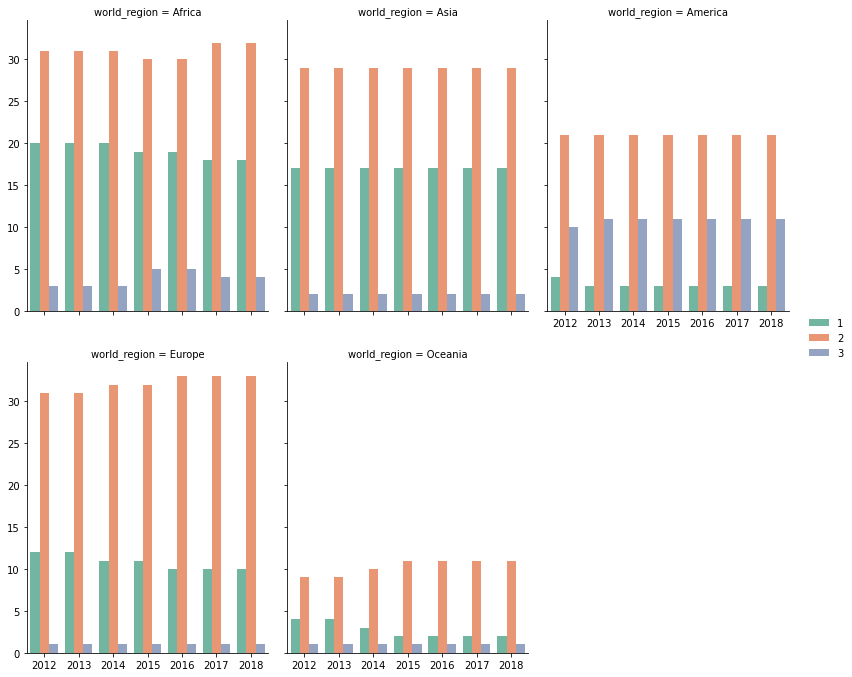

In [6]:
df_year = df.query('Year >=2012 & Year<=2018')

g = sns.FacetGrid(df_year,col='world_region',col_wrap = 3,legend_out=True)
g = (g.map_dataframe(sns.countplot,x='Year',hue='Dualcit_grouped', palette =sns.color_palette("Set2", 3) ).add_legend())
g.fig.set_figwidth(12)
g.fig.set_figheight(10)
plt.show()



In [7]:
def boxplot(year,indicator_code):
   
    df_year = df.loc[df['Year']==year]
    wdi_year = wdi[['Country Code','Indicator Code','Indicator Name',str(year),'Country Name']].loc[wdi['Indicator Code'] == indicator_code]
    df_year = df_year.merge(wdi_year, right_on='Country Code',left_on = 'ISO3' )
    
    fig,ax= plt.subplots(1,2,figsize=(15,5))
    box1 = sns.boxplot(data=df_year,x='Dualcit_binary',y=(df_year[str(year)]),ax = ax[0])
    box2 = sns.boxplot(data=df_year,x='Dualcit_grouped',y=(df_year[str(year)]),ax = ax[1])
    fig.suptitle((df_year['Indicator Name'].unique()))
    box1.set_ylabel('')
    #ax.set_xticklabels(['Automatic Loss','No Automatic Loss'])
    return 

In [8]:
indicators = wdi[['Indicator Code','Indicator Name']].set_index('Indicator Code').drop_duplicates()
pd.options.display.max_colwidth = 200
indicators.loc[indicators['Indicator Name'].str.contains('rights')]
#indicators to look SG.VAW.REFU.ZS - SI.POV.GINI - SP.POP.TECH.RD.P6 - per_allsp.adq_pop_tot
                    #- per_allsp.ben_q1_tot - SL.TLF.CACT.FM.NE.ZS
#maybe SE.TER.CUAT.DO.FE.ZS  - per_allsp.cov_pop_tot - SL.TLF.TOTL.FE.ZS -  SL.UEM.1524.NE.ZS         

,Indicator Name
Indicator Code,
IQ.CPA.PROP.XQ,CPIA property rights and rule-based governance rating (1=low to 6=high)
IC.LGL.CRED.XQ,Strength of legal rights index (0=weak to 12=strong)


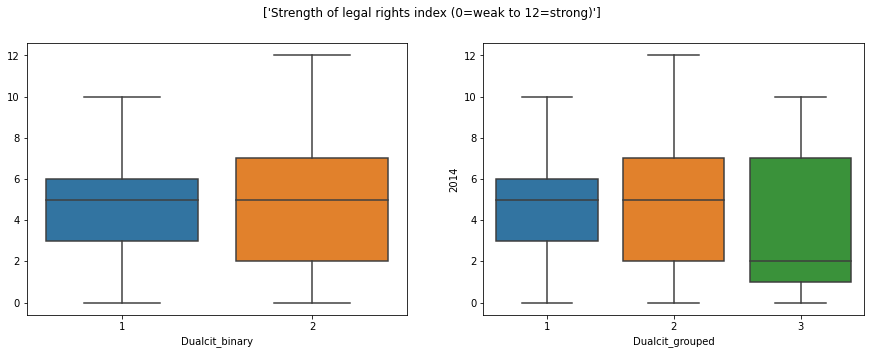

In [9]:
boxplot(2014,'IC.LGL.CRED.XQ')

In [17]:
America = ["nited States of America",'Canada','Mexico','Brazil', 'Colombia']
Europe = ['Italy', 'Germany', 'Denmark', 'Poland', 'United Kingdom (of Great Britain and Northern Ireland)']
Orient = ['China',  'Thailand', 'Australia', 'India',  'Azerbaijan']
Africa = ['South Africa', 'Djibouti', 'Morocco', 'Nigeria', 'Botswana']

In [16]:
df.loc[df['world_region']=='Africa']['country'].unique()

array(['Zimbabwe', 'Zambia', 'Uganda', 'Tunisia', 'Togo', 'Tanzania',
       'Swaziland', 'Sudan', 'South Sudan', 'South Africa', 'Somalia',
       'Sierra Leone', 'Seychelles', 'Senegal', 'Sao Tome and Principe',
       'Rwanda', 'Nigeria', 'Niger', 'Namibia', 'Mozambique', 'Morocco',
       'Mauritius', 'Mauritania', 'Mali', 'Malawi', 'Madagascar', 'Libya',
       'Liberia', 'Lesotho', 'Kenya', 'Guinea-Bissau', 'Guinea', 'Ghana',
       'Gambia', 'Gabon', 'Ethiopia', 'Eritrea', 'Equatorial Guinea',
       'Egypt', 'Djibouti', 'Cote dIvoire', 'Congo, Republic of the',
       'Congo, Democratic Republic of the', 'Comoros', 'Chad',
       'Central African Republic', 'Cape Verde', 'Cameroon', 'Burundi',
       'Burkina Faso', 'Botswana', 'Benin', 'Angola', 'Algeria'],
      dtype=object)